In [1]:
#https://github.com/miguelfzafra/Latest-News-Classifier/blob/master/0.%20Latest%20News%20Classifier/04.%20Model%20Training/09.%20MT%20-%20MultinomialNB.ipynb

import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
pathPickle = "Pickles"
path_df = pathPickle+"/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = pathPickle+"/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = pathPickle+"/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = pathPickle+"/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = pathPickle+"/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [2]:
mnbc = MultinomialNB()
mnbc.fit(features_train, labels_train)
mnbc_pred = mnbc.predict(features_test)
mnbc

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [3]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, mnbc.predict(features_train)))
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, mnbc_pred))

The training accuracy is: 
0.8739789964994166
The test accuracy is: 
0.8894389438943895


In [4]:
# Classification report
print("Classification report")
print(classification_report(labels_test,mnbc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.83      1.00      0.91       234
           2       0.98      0.84      0.91       189
           3       0.97      0.97      0.97        77
           4       0.00      0.00      0.00         5
           5       0.58      0.47      0.52        15
           6       0.92      0.97      0.94        34
           7       0.69      1.00      0.82         9
           8       0.93      0.78      0.85        18
           9       0.89      0.80      0.84        10

    accuracy                           0.89       606
   macro avg       0.68      0.68      0.68       606
weighted avg       0.87      0.89      0.87       606



/home/kelu/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


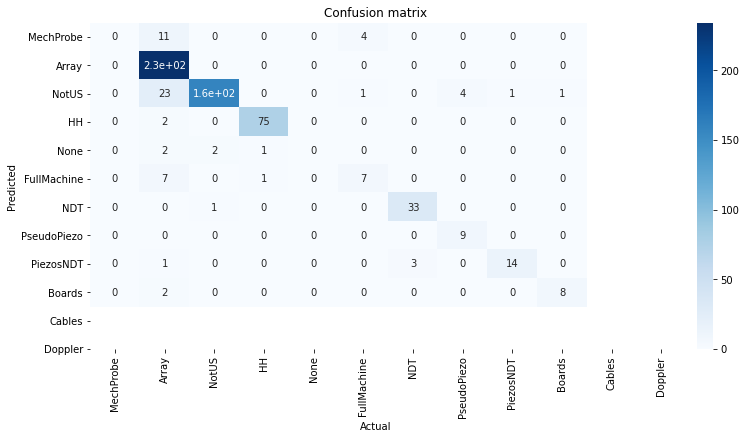

In [5]:
aux_df = df[['group', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, mnbc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['group'].values, 
            yticklabels=aux_df['group'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [6]:
d = {
     'Model': 'Multinomial Naïve Bayes',
     'Training Set Accuracy': accuracy_score(labels_train, mnbc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, mnbc_pred)
}

df_models_mnbc = pd.DataFrame(d, index=[0])

In [7]:
df_models_mnbc

,Model,Training Set Accuracy,Test Set Accuracy
0,Multinomial Naïve Bayes,0.873979,0.889439


In [8]:
with open('Models/best_mnbc.pickle', 'wb') as output:
    pickle.dump(mnbc, output)
    
with open('Models/df_models_mnbc.pickle', 'wb') as output:
    pickle.dump(df_models_mnbc, output)

# Testing the model

In [9]:
pathPickle = "Pickles"

path_X_train = pathPickle+"/X_train.pickle"
with open(path_X_train, 'rb') as data:
    X_train = pickle.load(data)

# X_test
path_X_test = pathPickle+"/X_test.pickle"
with open(path_X_test, 'rb') as data:
    X_test = pickle.load(data)

# y_train
path_y_train = pathPickle+"/y_train.pickle"
with open(path_y_train, 'rb') as data:
    y_train = pickle.load(data)

# y_test
path_y_test = pathPickle+"/y_test.pickle"
with open(path_y_test, 'rb') as data:
    y_test = pickle.load(data)

path_category_names = pathPickle+"/category_names.pickle"
with open(path_category_names, 'rb') as data:
    category_names = pickle.load(data)
    
path_category_codes = pathPickle+"/category_codes.pickle"
with open(path_category_codes, 'rb') as data:
    category_codes = pickle.load(data)

In [10]:
df.keys()

Index(['ItemID', 'value', '_currencyID', 'ViewItemURLForNaturalSearch',
       'Title', 'PrimaryCategoryID', 'Country', 'Description', 'group',
       'StrPrimaryCategoryID', 'Content', 'Title_Clean', 'Category_Code'],
      dtype='object')

In [11]:
predictions = mnbc.predict(features_test)
# Indexes of the test set
index_X_test = X_test.index
# We get them from the original df
df_test = df.loc[index_X_test]
# Add the predictions
df_test['Prediction'] = predictions
# Clean columns
df_test = df_test[['Title','ItemID',"ViewItemURLForNaturalSearch", 'group', 'Category_Code', 'Prediction']]
# Decode
df_test['Category_Predicted'] = df_test['Prediction']
df_test = df_test.replace({'Category_Predicted':category_names})
# Clean columns again
df_test = df_test[['Title', 'ItemID',"ViewItemURLForNaturalSearch",'group', 'Category_Predicted']]
# Getting differences in results
DIFFERENCES1 = df_test[~(df_test["group"] == df_test["Category_Predicted"])]
DIFFERENCES1

,Title,ItemID,ViewItemURLForNaturalSearch,group,Category_Predicted
2557,category185246 Ultrasound Therapy Transducer P...,143544670331,https://www.ebay.com/itm/Ultrasound-Therapy-Tr...,NotUS,Array
1553,"category9886 BMW G30 540i, Ultraschallsensor S...",184030866626,https://www.ebay.com/itm/BMW-G30-540i-Ultrasch...,PseudoPiezo,Cables
2050,category57520 Yushi Angle Beam Transducer Sens...,333457255146,https://www.ebay.com/itm/Yushi-Angle-Beam-Tran...,PiezosNDT,PseudoPiezo
1005,category181708 Mesure de Débit ultrason Nivus ...,133347030728,https://www.ebay.com/itm/Mesure-Debit-ultrason...,NDT,NotUS
2923,category184515 B&K UA0875 UA 0875 Medical Bi-O...,274156525330,https://www.ebay.com/itm/B-K-UA0875-UA-0875-Me...,NotUS,Array
...,...,...,...,...,...
3150,category163829 NDT 4.0MHz / 6mm Fingertip Case...,261459097400,https://www.ebay.com/itm/NDT-4-0MHz-6mm-Finger...,PiezosNDT,PseudoPiezo
1694,category71927 Kretz 3.5 MHz Interspec 13mm Ult...,112314330879,https://www.ebay.com/itm/Kretz-3-5-MHz-Intersp...,MechProbe,Array
2962,"category9886 BMW G30 525d, Ultraschallsensor M...",184036324179,https://www.ebay.com/itm/BMW-G30-525d-Ultrasch...,NotUS,Cables
918,category3179 PHILIPS ATL HDI 5000 SONOCT ULTRA...,324076474132,https://www.ebay.com/itm/PHILIPS-ATL-HDI-5000-...,Boards,PiezosNDT


In [12]:
predictions = mnbc.predict(features_train)
# Indexes of the test set
index_X_test = X_train.index
# We get them from the original df
df_test = df.loc[index_X_test]
# Add the predictions
df_test['Prediction'] = predictions
# Clean columns
df_test = df_test[['Title','ItemID',"ViewItemURLForNaturalSearch", 'group', 'Category_Code', 'Prediction']]
# Decode
df_test['Category_Predicted'] = df_test['Prediction']
df_test = df_test.replace({'Category_Predicted':category_names})
# Clean columns again
df_test = df_test[['Title', 'ItemID',"ViewItemURLForNaturalSearch",'group', 'Category_Predicted']]
# Getting differences in results
DIFFERENCES2 = df_test[~(df_test["group"] == df_test["Category_Predicted"])]
DIFFERENCES2

,Title,ItemID,ViewItemURLForNaturalSearch,group,Category_Predicted
2628,category4660 Yushi Angle Beam Transducer Shear...,254476275939,https://www.ebay.com/itm/Yushi-Angle-Beam-Tran...,PiezosNDT,PseudoPiezo
3136,category184515 ATL HDI 5000 General Ultrasound...,283764243607,https://www.ebay.com/itm/ATL-HDI-5000-General-...,FullMachine,PiezosNDT
1296,category184515 Ultrasound Transducer Probe Cov...,184194843956,https://www.ebay.com/itm/Ultrasound-Transducer...,NotUS,Array
981,category4678 Yushi PT-04 10Mhz Ultrasonic Tran...,264581335078,https://www.ebay.com/itm/Yushi-PT-04-10Mhz-Ult...,PiezosNDT,PseudoPiezo
3416,category181836 1 × Micro3 Fuse Automotive ATL ...,193366372360,https://www.ebay.com/itm/1-Micro3-Fuse-Automot...,None,NotUS
...,...,...,...,...,...
1085,category184542 ACUSON Siemens CYPRESS Portable...,153855875810,https://www.ebay.com/itm/ACUSON-Siemens-CYPRES...,HH,Array
667,category4678 Ultrasonic Sensor Yushi PT12 Prob...,264593548113,https://www.ebay.com/itm/Ultrasonic-Sensor-Yus...,PiezosNDT,PseudoPiezo
115,category184542 Philips ATL HDI 3000 Ultrasound...,233509133533,https://www.ebay.com/itm/Philips-ATL-HDI-3000-...,Boards,PiezosNDT
1109,category1244 ATL 2500-0833-03C Power Supply Mo...,274283750924,https://www.ebay.com/itm/ATL-2500-0833-03C-Pow...,Boards,NotUS


In [13]:
diff = pd.concat([DIFFERENCES1,DIFFERENCES2])
diff.to_excel("to_check.xlsx")
diff

,Title,ItemID,ViewItemURLForNaturalSearch,group,Category_Predicted
2557,category185246 Ultrasound Therapy Transducer P...,143544670331,https://www.ebay.com/itm/Ultrasound-Therapy-Tr...,NotUS,Array
1553,"category9886 BMW G30 540i, Ultraschallsensor S...",184030866626,https://www.ebay.com/itm/BMW-G30-540i-Ultrasch...,PseudoPiezo,Cables
2050,category57520 Yushi Angle Beam Transducer Sens...,333457255146,https://www.ebay.com/itm/Yushi-Angle-Beam-Tran...,PiezosNDT,PseudoPiezo
1005,category181708 Mesure de Débit ultrason Nivus ...,133347030728,https://www.ebay.com/itm/Mesure-Debit-ultrason...,NDT,NotUS
2923,category184515 B&K UA0875 UA 0875 Medical Bi-O...,274156525330,https://www.ebay.com/itm/B-K-UA0875-UA-0875-Me...,NotUS,Array
...,...,...,...,...,...
1085,category184542 ACUSON Siemens CYPRESS Portable...,153855875810,https://www.ebay.com/itm/ACUSON-Siemens-CYPRES...,HH,Array
667,category4678 Ultrasonic Sensor Yushi PT12 Prob...,264593548113,https://www.ebay.com/itm/Ultrasonic-Sensor-Yus...,PiezosNDT,PseudoPiezo
115,category184542 Philips ATL HDI 3000 Ultrasound...,233509133533,https://www.ebay.com/itm/Philips-ATL-HDI-3000-...,Boards,PiezosNDT
1109,category1244 ATL 2500-0833-03C Power Supply Mo...,274283750924,https://www.ebay.com/itm/ATL-2500-0833-03C-Pow...,Boards,NotUS


# After doing manual corrections

In [14]:
new = pd.read_excel("to_check_ok.xlsx").dropna()
new

,Unnamed: 0,Title,ItemID,ViewItemURLForNaturalSearch,group,Category_Predicted,MyCat
0,1857,GE LOGIQ 200 Pro Series Ultraschallgerät mit ...,114125257139,https://www.ebay.com/itm/GE-LOGIQ-200-Pro-Seri...,Boards,Array,Boards
1,1569,HP 77110-60430 Probe Connector Board for Phili...,223686050316,https://www.ebay.com/itm/HP-77110-60430-Probe-...,Boards,Array,Boards
2,3034,KRETZTECHNIK / 195073 45204 64 CNM 3A P3,382897423305,https://www.ebay.com/itm/KRETZTECHNIK-195073-4...,Boards,Array,Boards
3,806,KRETZTECHNIK / 195073 45204 64 CNM 3A P3,261734099990,https://www.ebay.com/itm/KRETZTECHNIK-195073-4...,Boards,Array,Boards
4,853,GE Voluson Ultrasound Motherboard Kretz 194329...,274286643425,https://www.ebay.com/itm/GE-Voluson-Ultrasound...,Boards,Array,Boards
...,...,...,...,...,...,...,...
833,731,"BMW G30 530i, Ultraschallsensor schwarz, 66209...",184030839334,https://www.ebay.com/itm/BMW-G30-530i-Ultrasch...,NotUS,PseudoPiezo,NotUS
834,944,"BMW G30 520d, Ultraschallsensor Kaschmirsilber...",184037699484,https://www.ebay.com/itm/BMW-G30-520d-Ultrasch...,NotUS,PseudoPiezo,NotUS
835,1680,"BMW G30 520dX, Ultraschallsensor Mineralweiss,...",184036316841,https://www.ebay.com/itm/BMW-G30-520dX-Ultrasc...,NotUS,PseudoPiezo,NotUS
836,2809,"BMW G30 525d, Ultraschallsensor Mineralweiss, ...",184036324131,https://www.ebay.com/itm/BMW-G30-525d-Ultrasch...,NotUS,PseudoPiezo,NotUS


In [15]:
import os
pathimg = "/home/kelu/ultrasound/ebaystrove/images/"

In [16]:
if 0:
    for row in range(len(new)):
        if new.iloc[row]["group"] == "None":
            pathfrom = pathimg + str(new.iloc[row]["ItemID"])
        else:
            pathfrom = pathimg + new.iloc[row]["group"] + "/" + str(new.iloc[row]["ItemID"])
        pathto = pathimg + new.iloc[row]["MyCat"] + "/"

        try:
            os.rename(pathfrom + ".jpg", pathto+str(new.iloc[row]["ItemID"])+".jpg")
        except:
            print("Error on "+str(new.iloc[row]["ItemID"])+".jpg")